# Introduction

With sports becoming such a massive focal point in todays society, having a good team could be a gold mine for both a the owner as well as for the city or country. With the amount of money circling the sports world, having a competitive team could provide good revenue to the city and its local businesses as well as for the management. The city as a whole would benefit as a good sports team would have people migrate from outside the area, bringing in tax dollars as well. This is why sometimes cities will bid such redicously high money a team. Knowing that by paying potentially billions up front, they could over extend that by 10+ times the amount later on. However, just getting a team is half the battle. People wont pay money to see crappy performances. This is why building a competitive and winning team is also just as important. And that is the goal for many owners and managers throughout the world. How do I build a competitive team so that 1) we can be winning games and 2) bringing the city and people billions of dollars of revenue. That is what I hope to see with this dataset. What do the good teams continously have versus what the bad teams are missing. By figuring out what to potentially focus on (speed, pressure, age, etc) we could potentially gain insight into what makes the good teams good, and what the bad teams are ultimately missing. 

# Clustering

For this project, we will be attempting to solve this dilemma via clustering. But what is clustering? Clustering is grouping our samples based on similar features in the hope of finding patterns or similarities between each group. By finding these differences and similarities, you could potentially gain insight into what the specific groups are doing that would cluster them there. There are two kinds of clusters (that I was taught) that we will be using for this project. K-Means Clustering and Agglomerative Clustering. K-Means Clustering is a type of clustering algorithm where we choose the K amount of clusters we wish to use on our data. From there, the model then works by randomly placing the clusters center on our data and grouping them based on closeness to the cluster. After it goes through, it updates the center to the new group of clusters and runs again. This time checking to see if any of the new data points would need to be assigned to a new cluster. It runs until either a set amount of time (loops) or until the data points no longer switch clusters. Another kind of clustering we will do for this project is Agglomerative Clustering. With this form of clustering, we instead start with the data all as individual clusters, then we loop through the data and essentially grow the cluster by consuming nearby data points. Think of this as a growing blob. As it expands, it starts to trap data in its grouping. From here we go until all the data are placed into groups with its nearest cluster point. The main difference from this model and the K-Means, is that with the K-Means we are predefining the amount of clusters we have. With agglomerative, it creates clusters as needed that are not being grouped with other clusters. 

The cite from which I got this dataset from. <br>
https://www.kaggle.com/datasets/moradi/fifa-stats?select=fifa_teams_cleaned.csv

In [6]:
import pandas as pd
import seaborn as sbn

# Data Loading

In [8]:
fifa_df = pd.read_csv('fifa_teams_cleaned.csv')
fifa_df.head()

ID  Overall  Attack  Midfield  Defence Transfer budget Club worth Speed  \
0    1       83      83        85       82              €0      €2.1B  Slow   
1   11       81      78        78       82              €0      €4.8B  Slow   
2  241       84      84        84       84              €0      €4.3B  Slow   
3   10       85      86        87       84              €0      €4.6B  Slow   
4  243       85      87        86       84              €0      €4.8B  Slow   

  Dribbling Passing  ... Aggression Pressure Team width Defender line  \
0    Little    Safe  ...    Contain     Deep     Narrow         Cover   
1    Little    Safe  ...    Contain     Deep     Narrow         Cover   
2    Little    Safe  ...    Contain     Deep     Narrow         Cover   
3    Little    Safe  ...    Contain     Deep     Narrow         Cover   
4    Little    Safe  ...    Contain     Deep     Narrow         Cover   

  Domestic prestige International prestige Players  Starting XI average age  \
0                 8                      7      33                    24.91   
1                 9                      8      33                    24.18   
2                10                     10      33                    27.91   
3                10                     10      28                    26.82   
4                10                     10      33                    26.36   

   Whole team average age        date  
0                   23.27  2024-07-08  
1                   24.18  2024-07-08  
2                   23.24  2024-07-08  
3                   24.50  2024-07-08  
4                   24.52  2024-07-08  

[5 rows x 23 columns]

In [9]:
fifa_df.shape

(13318, 23)

# Data Preprocessing

In [11]:
fifa_df.columns

Index(['ID', 'Overall', 'Attack', 'Midfield', 'Defence', 'Transfer budget',
       'Club worth', 'Speed', 'Dribbling', 'Passing', 'Positioning',
       'Crossing', 'Shooting', 'Aggression', 'Pressure', 'Team width',
       'Defender line', 'Domestic prestige', 'International prestige',
       'Players', 'Starting XI average age', 'Whole team average age', 'date'],
      dtype='object')

Check to see if we have any duplicate rows, if so we will need to drop the duplicated rows from the dataset.

In [13]:
fifa_df.duplicated().sum()

2373

In [14]:
fifa_df = fifa_df.drop_duplicates()
fifa_df.shape

(10945, 23)

In [15]:
fifa_df.isna().sum()

ID                         0
Overall                    0
Attack                     0
Midfield                   0
Defence                    0
Transfer budget            0
Club worth                 0
Speed                      0
Dribbling                  0
Passing                    0
Positioning                0
Crossing                   0
Shooting                   0
Aggression                 0
Pressure                   0
Team width                 0
Defender line              0
Domestic prestige          0
International prestige     0
Players                    0
Starting XI average age    0
Whole team average age     0
date                       0
dtype: int64

In [16]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10945 entries, 0 to 13317
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10945 non-null  int64  
 1   Overall                  10945 non-null  int64  
 2   Attack                   10945 non-null  int64  
 3   Midfield                 10945 non-null  int64  
 4   Defence                  10945 non-null  int64  
 5   Transfer budget          10945 non-null  object 
 6   Club worth               10945 non-null  object 
 7   Speed                    10945 non-null  object 
 8   Dribbling                10945 non-null  object 
 9   Passing                  10945 non-null  object 
 10  Positioning              10945 non-null  object 
 11  Crossing                 10945 non-null  object 
 12  Shooting                 10945 non-null  object 
 13  Aggression               10945 non-null  object 
 14  Pressure                 10

In [17]:
drop_columns = ['ID', 'Transfer budget', 'Club worth', 'Positioning', 'Team width', 'Defender line', 'Players', 'date']
fifa_df = fifa_df.drop(columns=drop_columns)
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10945 entries, 0 to 13317
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall                  10945 non-null  int64  
 1   Attack                   10945 non-null  int64  
 2   Midfield                 10945 non-null  int64  
 3   Defence                  10945 non-null  int64  
 4   Speed                    10945 non-null  object 
 5   Dribbling                10945 non-null  object 
 6   Passing                  10945 non-null  object 
 7   Crossing                 10945 non-null  object 
 8   Shooting                 10945 non-null  object 
 9   Aggression               10945 non-null  object 
 10  Pressure                 10945 non-null  object 
 11  Domestic prestige        10945 non-null  int64  
 12  International prestige   10945 non-null  int64  
 13  Starting XI average age  10945 non-null  float64
 14  Whole team average age   10

For this next step, having object datatypes is not helpful for me. As a result, I need to change some of the columns to a an integer datatype (int64 just for consistency). As a result, I apply sklearns LabelEncoder class call to help with this preprocessing step. 

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
change_columns = ['Speed', 'Dribbling', 'Passing', 'Crossing', 'Shooting', 'Aggression', 'Pressure']
for column in change_columns:
    fifa_df[column] = label_encoder.fit_transform(fifa_df[column])
    fifa_df[column] = fifa_df[column].astype('int64')
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10945 entries, 0 to 13317
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall                  10945 non-null  int64  
 1   Attack                   10945 non-null  int64  
 2   Midfield                 10945 non-null  int64  
 3   Defence                  10945 non-null  int64  
 4   Speed                    10945 non-null  int64  
 5   Dribbling                10945 non-null  int64  
 6   Passing                  10945 non-null  int64  
 7   Crossing                 10945 non-null  int64  
 8   Shooting                 10945 non-null  int64  
 9   Aggression               10945 non-null  int64  
 10  Pressure                 10945 non-null  int64  
 11  Domestic prestige        10945 non-null  int64  
 12  International prestige   10945 non-null  int64  
 13  Starting XI average age  10945 non-null  float64
 14  Whole team average age   10

In [20]:
fifa_df.head(2)

Overall  Attack  Midfield  Defence  Speed  Dribbling  Passing  Crossing  \
0       83      83        85       82      2          0        2         0   
1       81      78        78       82      2          0        2         0   

   Shooting  Aggression  Pressure  Domestic prestige  International prestige  \
0         0           0         0                  8                       7   
1         0           0         0                  9                       8   

   Starting XI average age  Whole team average age  
0                    24.91                   23.27  
1                    24.18                   24.18

In [21]:
fifa_df.describe().T

count       mean       std    min    25%    50%  \
Overall                  10945.0  69.753586  5.320420  50.00  66.00  69.00   
Attack                   10945.0  70.249063  5.753297  51.00  67.00  70.00   
Midfield                 10945.0  69.721882  5.396821  49.00  66.00  69.00   
Defence                  10945.0  69.015258  5.314320  50.00  65.00  68.00   
Speed                    10945.0   1.956327  0.274914   0.00   2.00   2.00   
Dribbling                10945.0   0.039653  0.277176   0.00   0.00   0.00   
Passing                  10945.0   1.951302  0.301229   0.00   2.00   2.00   
Crossing                 10945.0   0.046779  0.293081   0.00   0.00   0.00   
Shooting                 10945.0   0.045774  0.285823   0.00   0.00   0.00   
Aggression               10945.0   0.021380  0.144653   0.00   0.00   0.00   
Pressure                 10945.0   0.042942  0.284180   0.00   0.00   0.00   
Domestic prestige        10945.0   5.910735  3.018519   1.00   3.00   6.00   
International prestige   10945.0   2.876565  2.367703   1.00   1.00   2.00   
Starting XI average age  10945.0  26.204022  1.828507  19.55  25.00  26.27   
Whole team average age   10945.0  24.995081  1.593294  19.50  24.03  24.93   

                           75%    max  
Overall                  73.00  85.00  
Attack                   74.00  90.00  
Midfield                 73.00  87.00  
Defence                  72.00  84.00  
Speed                     2.00   2.00  
Dribbling                 0.00   2.00  
Passing                   2.00   2.00  
Crossing                  0.00   2.00  
Shooting                  0.00   2.00  
Aggression                0.00   1.00  
Pressure                  0.00   2.00  
Domestic prestige         9.00  20.00  
International prestige    4.00  13.00  
Starting XI average age  27.36  34.27  
Whole team average age   25.88  33.22

# Data Visualization

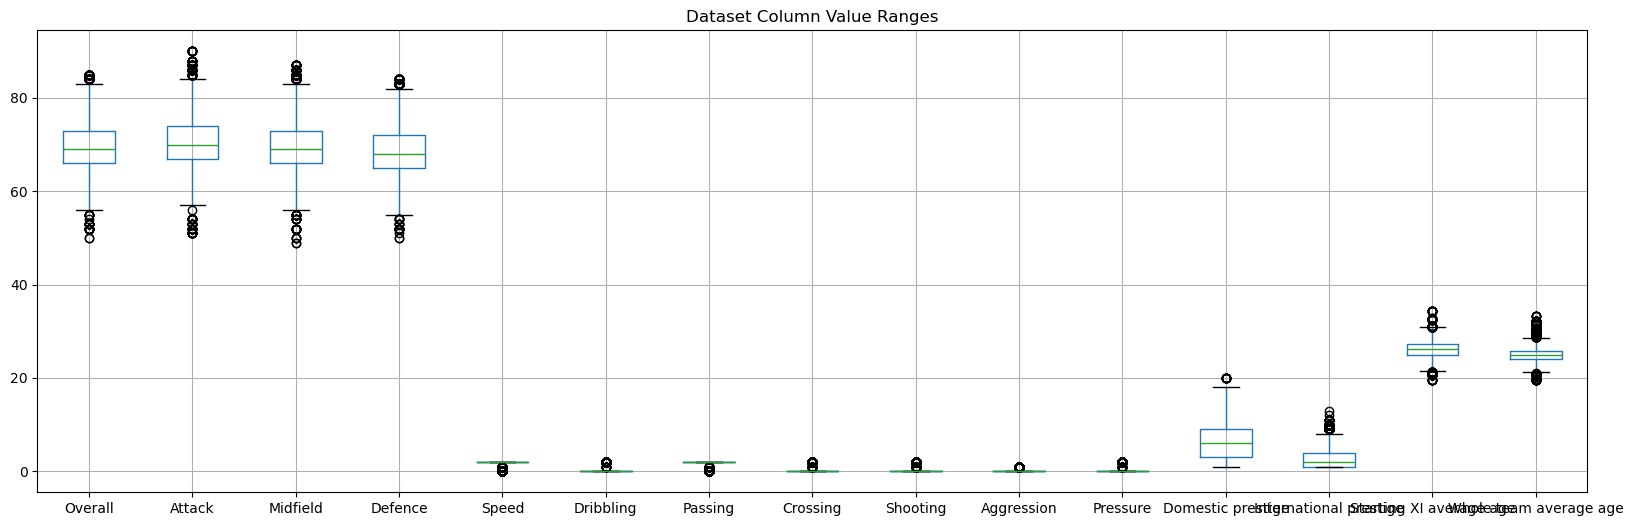

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.title('Dataset Column Value Ranges')
fifa_df.boxplot()
plt.show()

By looking at this boxplot, we can see we will need to standardize the data. By having different columns in different range sets, we know that if we do not standardize our data, it can create stronger pulls and decision makings between heavier/larger data columns. 

In [25]:
import seaborn as sbn

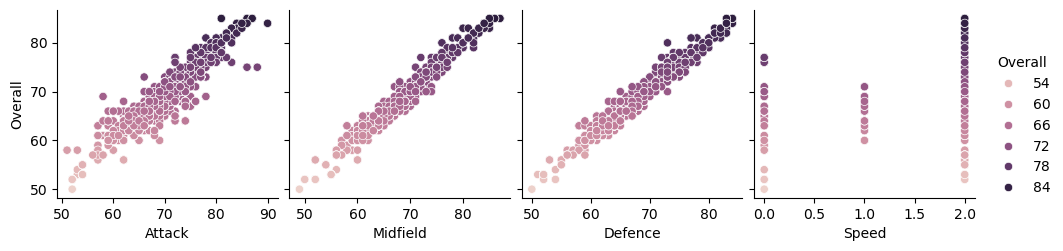

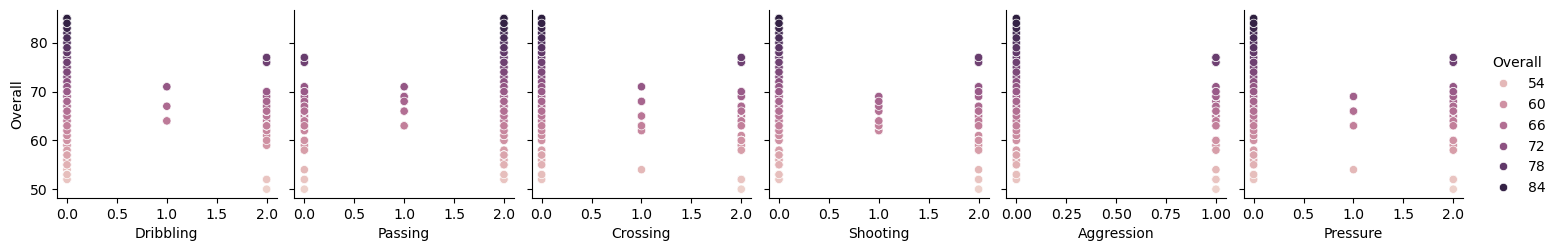

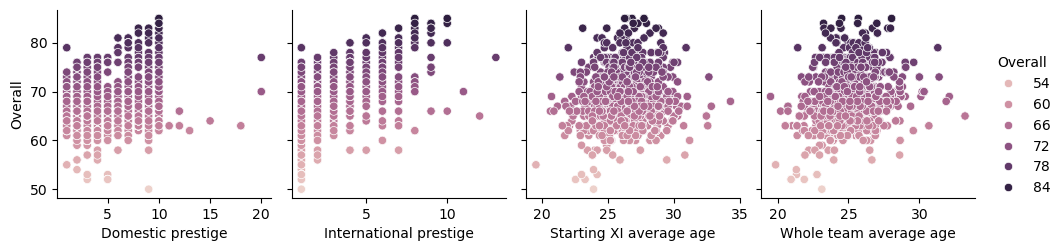

In [26]:
x_columns = fifa_df.drop(columns='Overall').columns
first_third = int(len(x_columns)/3)
sbn.pairplot(fifa_df, x_vars=x_columns[:first_third], y_vars = 'Overall', hue='Overall')
end = int(len(x_columns))
sbn.pairplot(fifa_df, x_vars=x_columns[first_third: (end- first_third)], y_vars = 'Overall', hue='Overall')
sbn.pairplot(fifa_df, x_vars=x_columns[(end- first_third):], y_vars = 'Overall', hue='Overall')

When looking at teams overall's, we see that there is a direct correlation between having better midfield, defense and attack ratings when trying to build a higher overall team. We see a slight correlation between domestic, prestige, international prestige, and while team average age. 

<Axes: >

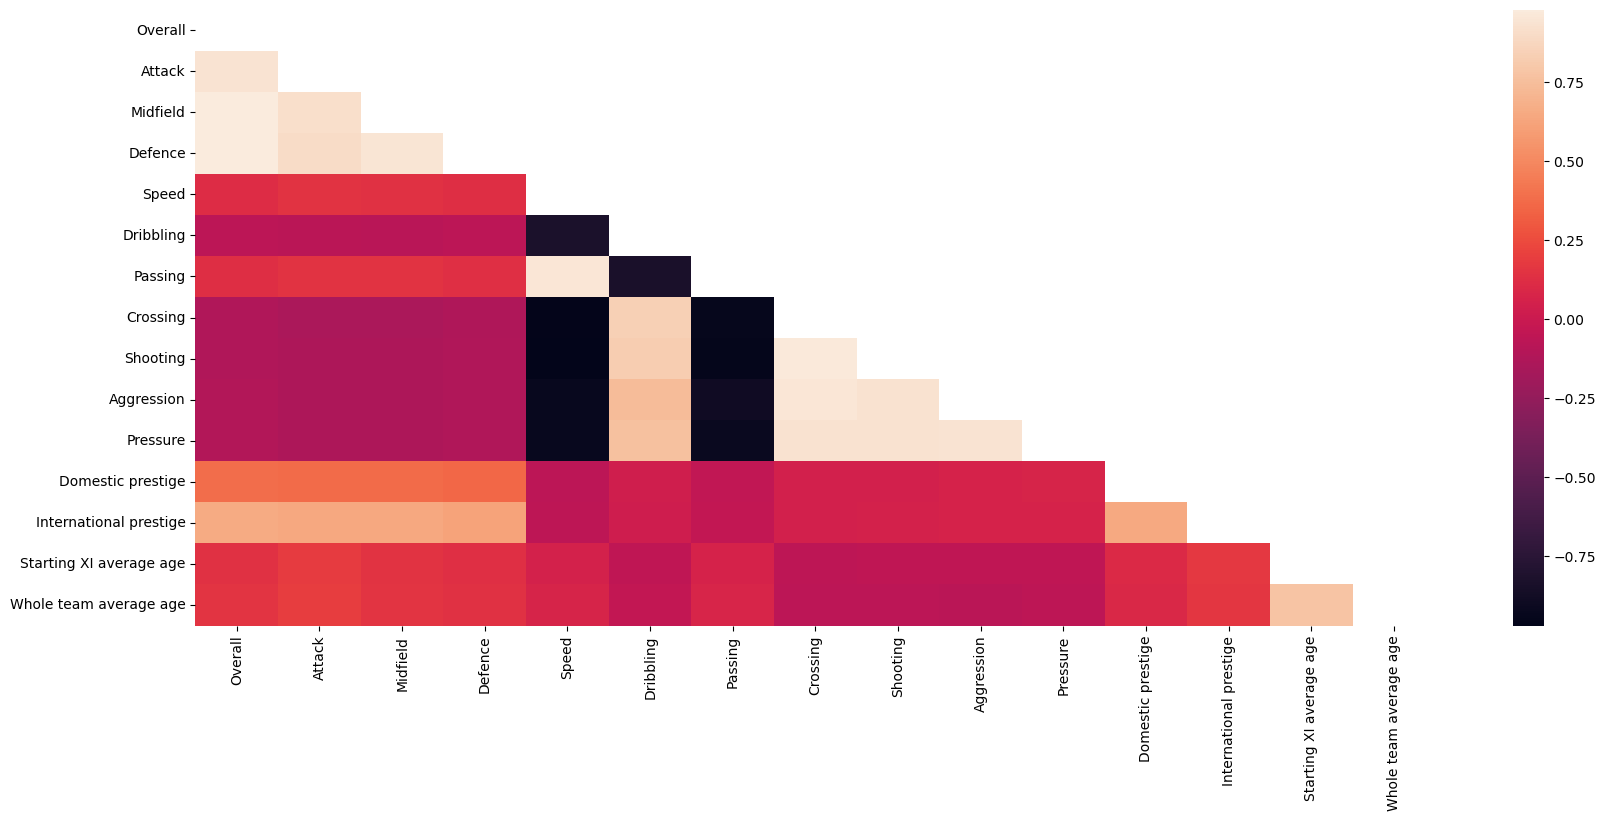

In [28]:
import numpy as np
corr = fifa_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,8))
sbn.heatmap(corr, mask=mask)

We see again from the heatmap that attack, midfield and defence are the strongest correlators to a teams overall, boosting those statistics. We also see from this map that teams with good a good attack also tend to have a good midfield and defence, and a team with a good midfield has a very good defence. We then see teams with better speed tend to have better passing. Teams with better dribbling have better crossing, shooting, aggression, and pressure ratings. 

## Standardize Data and Review Correlations

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
standardized_fifa_df = pd.DataFrame(scaler.fit_transform(fifa_df), columns=fifa_df.columns)
standardized_fifa_df.head(3)

Overall    Attack  Midfield   Defence     Speed  Dribbling   Passing  \
0  2.489844  2.216385  2.831077  2.443461  0.158867  -0.143066  0.161672   
1  2.113917  1.347278  1.533958  2.443461  0.158867  -0.143066  0.161672   
2  2.677808  2.390206  2.645774  2.819820  0.158867  -0.143066  0.161672   

   Crossing  Shooting  Aggression  Pressure  Domestic prestige  \
0  -0.15962 -0.160157   -0.147806 -0.151115           0.692180   
1  -0.15962 -0.160157   -0.147806 -0.151115           1.023484   
2  -0.15962 -0.160157   -0.147806 -0.151115           1.354787   

   International prestige  Starting XI average age  Whole team average age  
0                1.741614                -0.707725               -1.082763  
1                2.163983                -1.106977               -0.511593  
2                3.008723                 0.933032               -1.101593

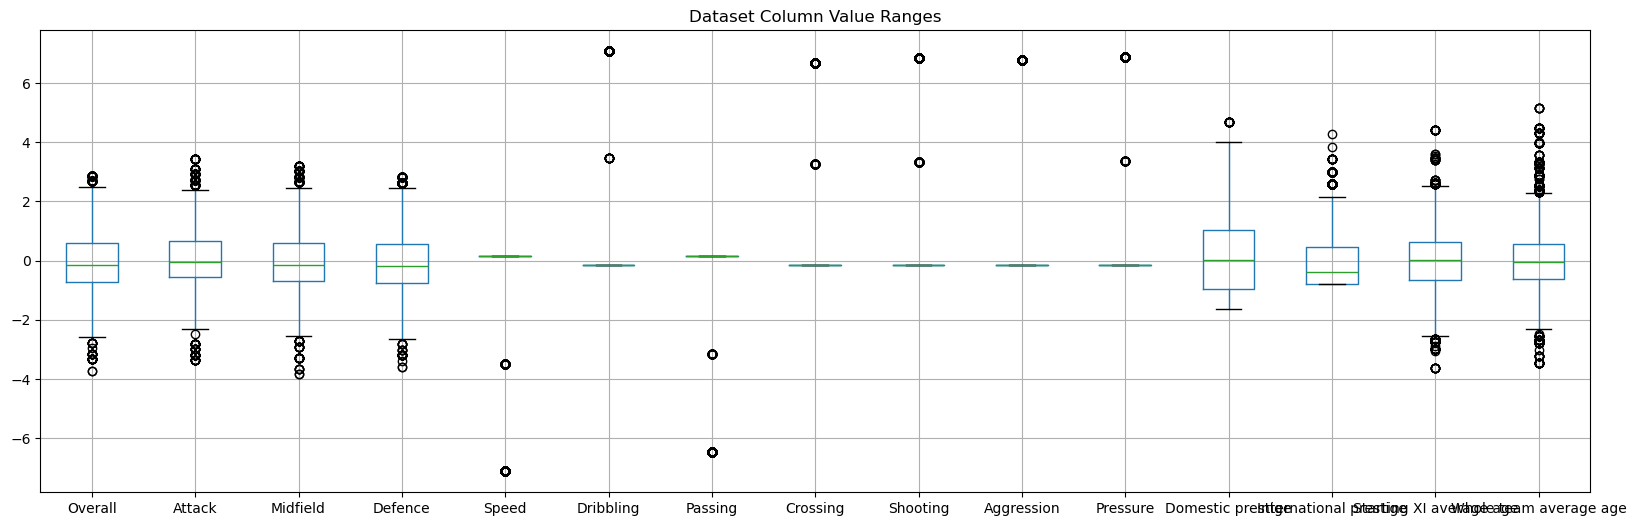

In [33]:
plt.figure(figsize=(20,6))
plt.title('Dataset Column Value Ranges')
standardized_fifa_df.boxplot()
plt.show()

<Axes: >

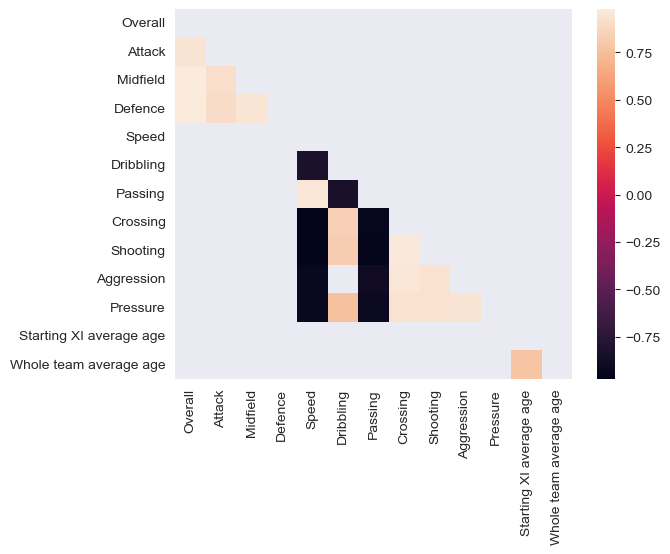

In [34]:
stand_corr = standardized_fifa_df.corr()
high_stand_corr = stand_corr[abs(stand_corr) >= .75]
high_stand_corr.replace(1, np.nan, inplace=True)
# Drop rows and columns where they have no high correlation with anything
high_stand_corr.dropna(how='all', axis=0, inplace=True)
high_stand_corr.dropna(how='all', axis=1, inplace=True)
# Due to the pallet having white and the missing correlations being white, lets darken the background
sbn.set_style('dark')
mask = np.triu(np.ones_like(high_stand_corr, dtype=bool))
sbn.heatmap(high_stand_corr, mask=mask)

# Clustering Modeling

In [36]:
from sklearn.decomposition import PCA

### PCA Creation

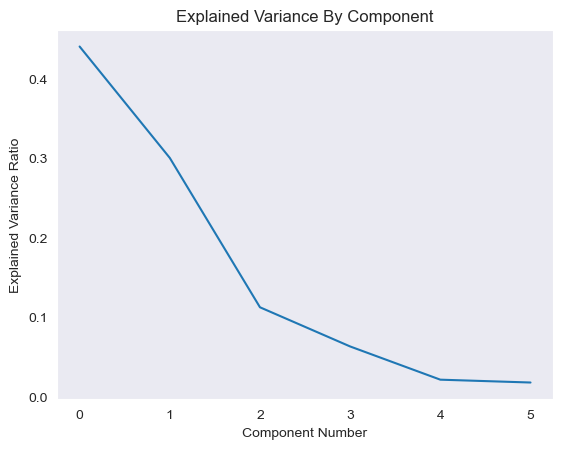

In [38]:
pca = PCA(n_components=0.95)
pca.fit(standardized_fifa_df)
plt.plot(pca.explained_variance_ratio_) 

plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance By Component')

plt.show()

To simplify our dataset to create easier clustering capabilities, we want to reduce the number of features (components) while still having the highest variance possible. As a result we will go with a component number of 2, as the difference after that is not as large.

In [40]:
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(standardized_fifa_df))
pca_df.shape

(10945, 2)

### K-Means Clustering

In [42]:
from sklearn.cluster import KMeans

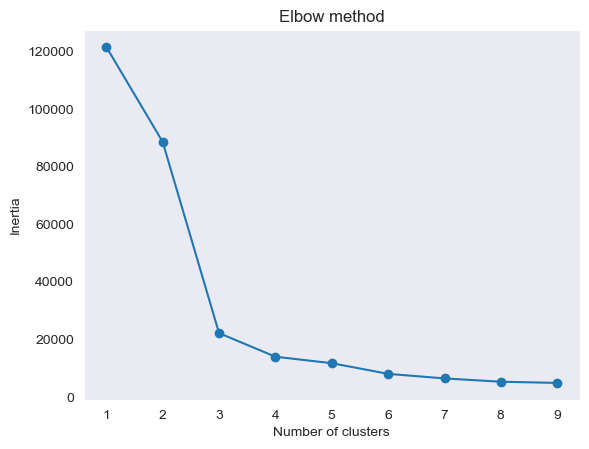

In [43]:
inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    clusters = kmeans.fit_predict(pca_df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

To figure out the amount of clusters I want to create, I first am trying the elbow method. With this, we are trying to find how tight our clusters are. It is best to choose the number of clusters that creates a sharp turn in the graph. This is also known as the elbow method, which is where if we visualized this as an arm, we want to choose the clusters that make this an elbow. As a result, from this graph it appears the optimal number of clusters to choose would be 3.

In [45]:
from sklearn.metrics import silhouette_score

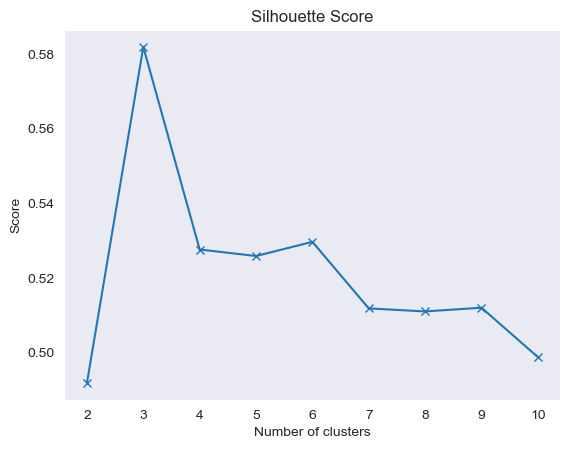

In [46]:
silhouette_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    clusters = kmeans.fit_predict(pca_df)
    silhouette_scores.append(silhouette_score(pca_df, clusters))

plt.plot(range(2,11), silhouette_scores, marker='x')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

Another way to choose the amount of cluster we wish to have is the Silhouette Score. With this, we are comparing/scoring how similar the data is to each other within the same cluster. From this graph, we see again that 3 clusters provides the highest scoring. As a result we will use 3 clusters for our K-Means Clustering.

In [48]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_df)
standardized_fifa_df['Clusters'] = kmeans.predict(pca_df)

In [49]:
standardized_fifa_df['Clusters'].value_counts()

Clusters
1    7088
0    3588
2     269
Name: count, dtype: int64

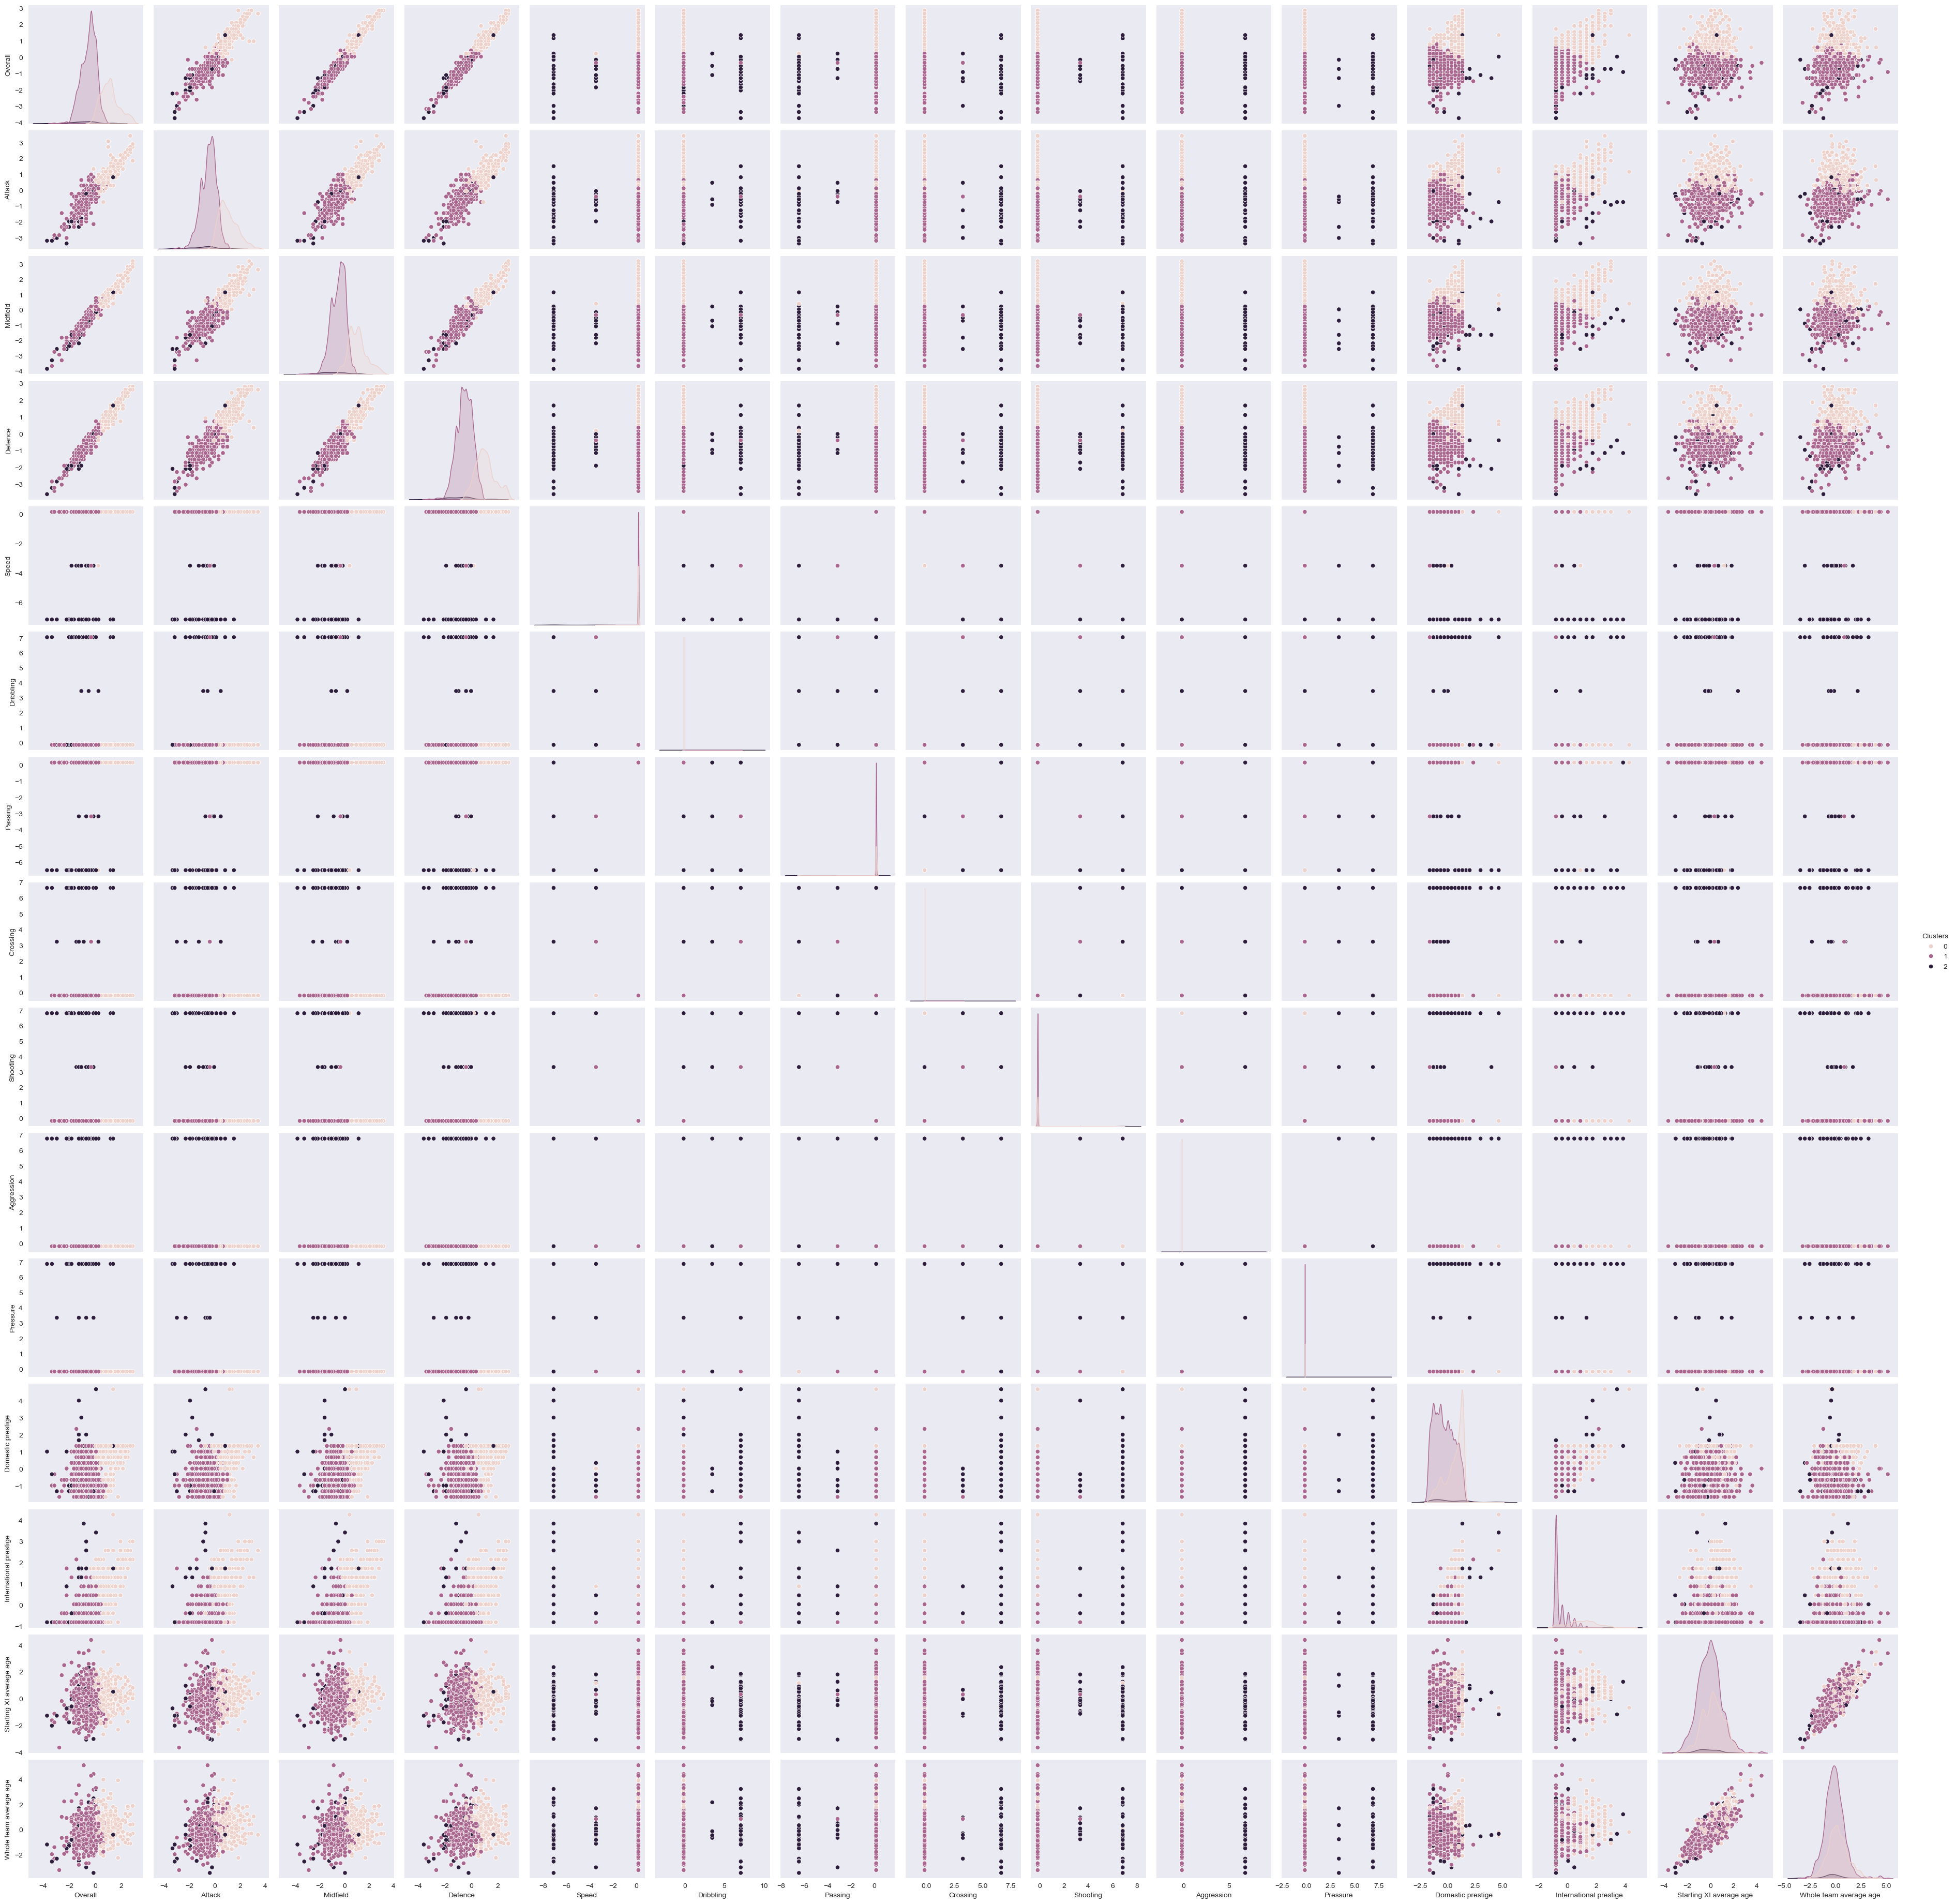

In [50]:
subset = standardized_fifa_df.drop(columns='Clusters').columns

sbn.pairplot(standardized_fifa_df, hue='Clusters', vars=subset)

We see from this pairplot the 3 clusters and what they sort of visualize. Cluster 0 has the higher overall teams, cluster 1 has the below average to average teams, and cluster 3 appears to be an outlier cluster that is picking up majority lower level overall teams with a couple high overall teams. From this image, we see with the attack, midfield and defense levels a similar trend from our heatmap, which is that the better team tends to have a higher attack, midfield and defence rating. We can also see the better teams are faster (higher speed), do less dribbling, and also do little crossing according to the data. 

### Agglomerative Clustering

In [53]:
import scipy.cluster.hierarchy as sch

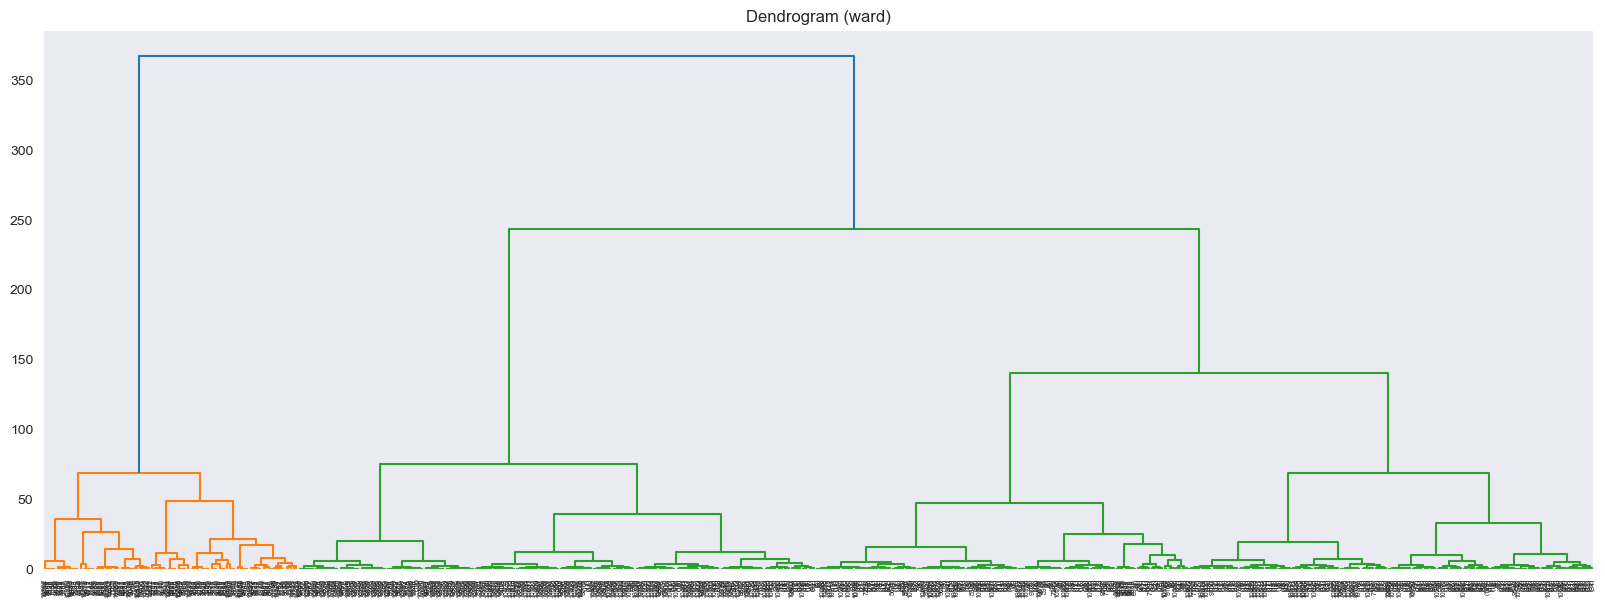

In [54]:
# documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
plt.figure(figsize=(20,7))
plt.title('Dendrogram (ward)')

dend_ward = sch.dendrogram(sch.linkage(pca_df,method='ward'), truncate_mode='level',p=10)
plt.show()

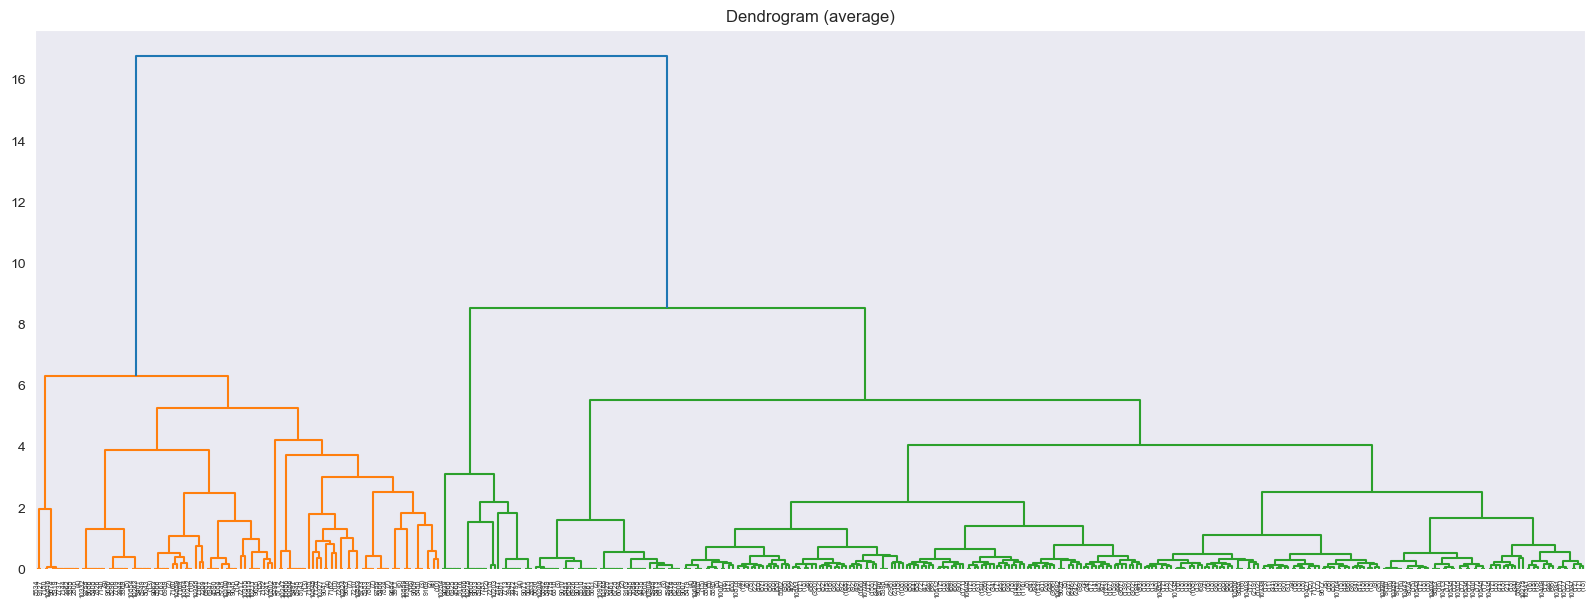

In [55]:
plt.figure(figsize=(20,7))
plt.title('Dendrogram (average)')

dend_avg = sch.dendrogram(sch.linkage(pca_df,method='average'), truncate_mode='level',p=10)
plt.show()

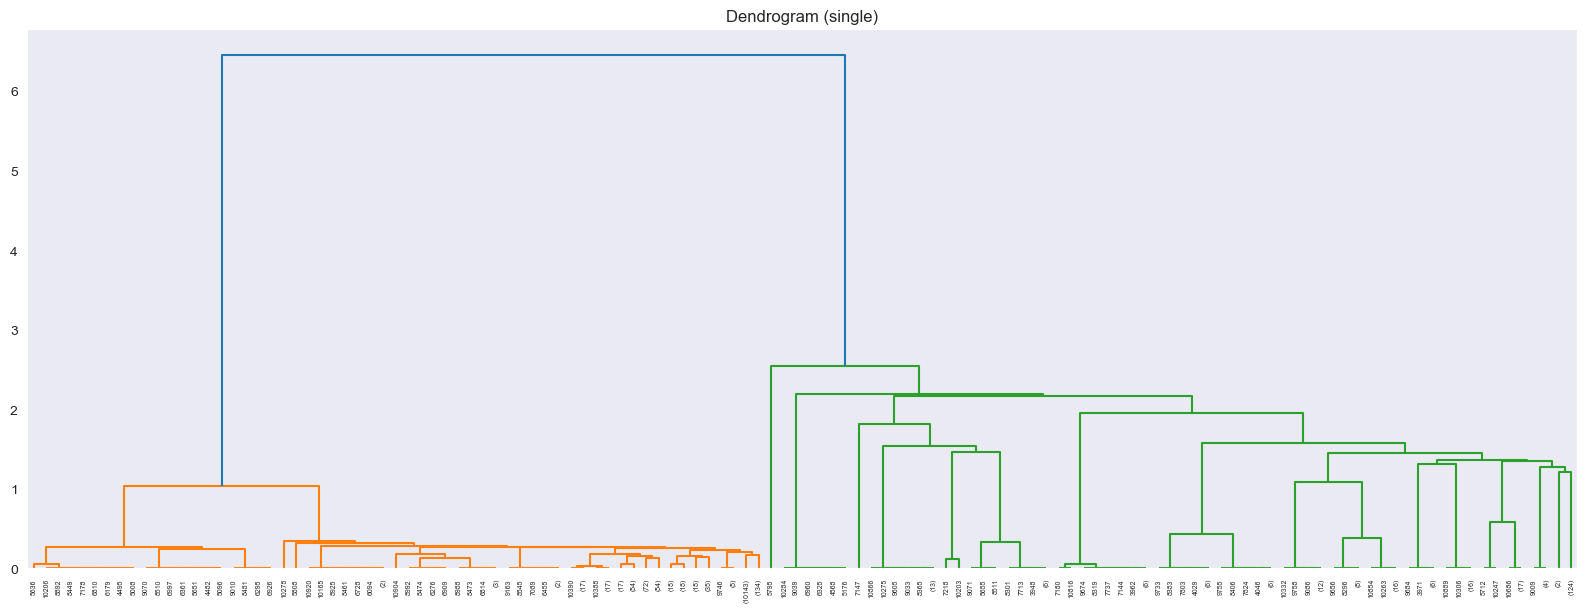

In [56]:
plt.figure(figsize=(20,7))
plt.title('Dendrogram (single)')

dend_single = sch.dendrogram(sch.linkage(pca_df, method='single'), truncate_mode='level',p=10)
plt.show()

In [57]:
from sklearn.cluster import AgglomerativeClustering

In [58]:
agglo = AgglomerativeClustering(linkage='single')
standardized_fifa_df['Clusters'] = agglo.fit_predict(pca_df)
standardized_fifa_df['Clusters'].value_counts()

Clusters
1    10652
0      293
Name: count, dtype: int64

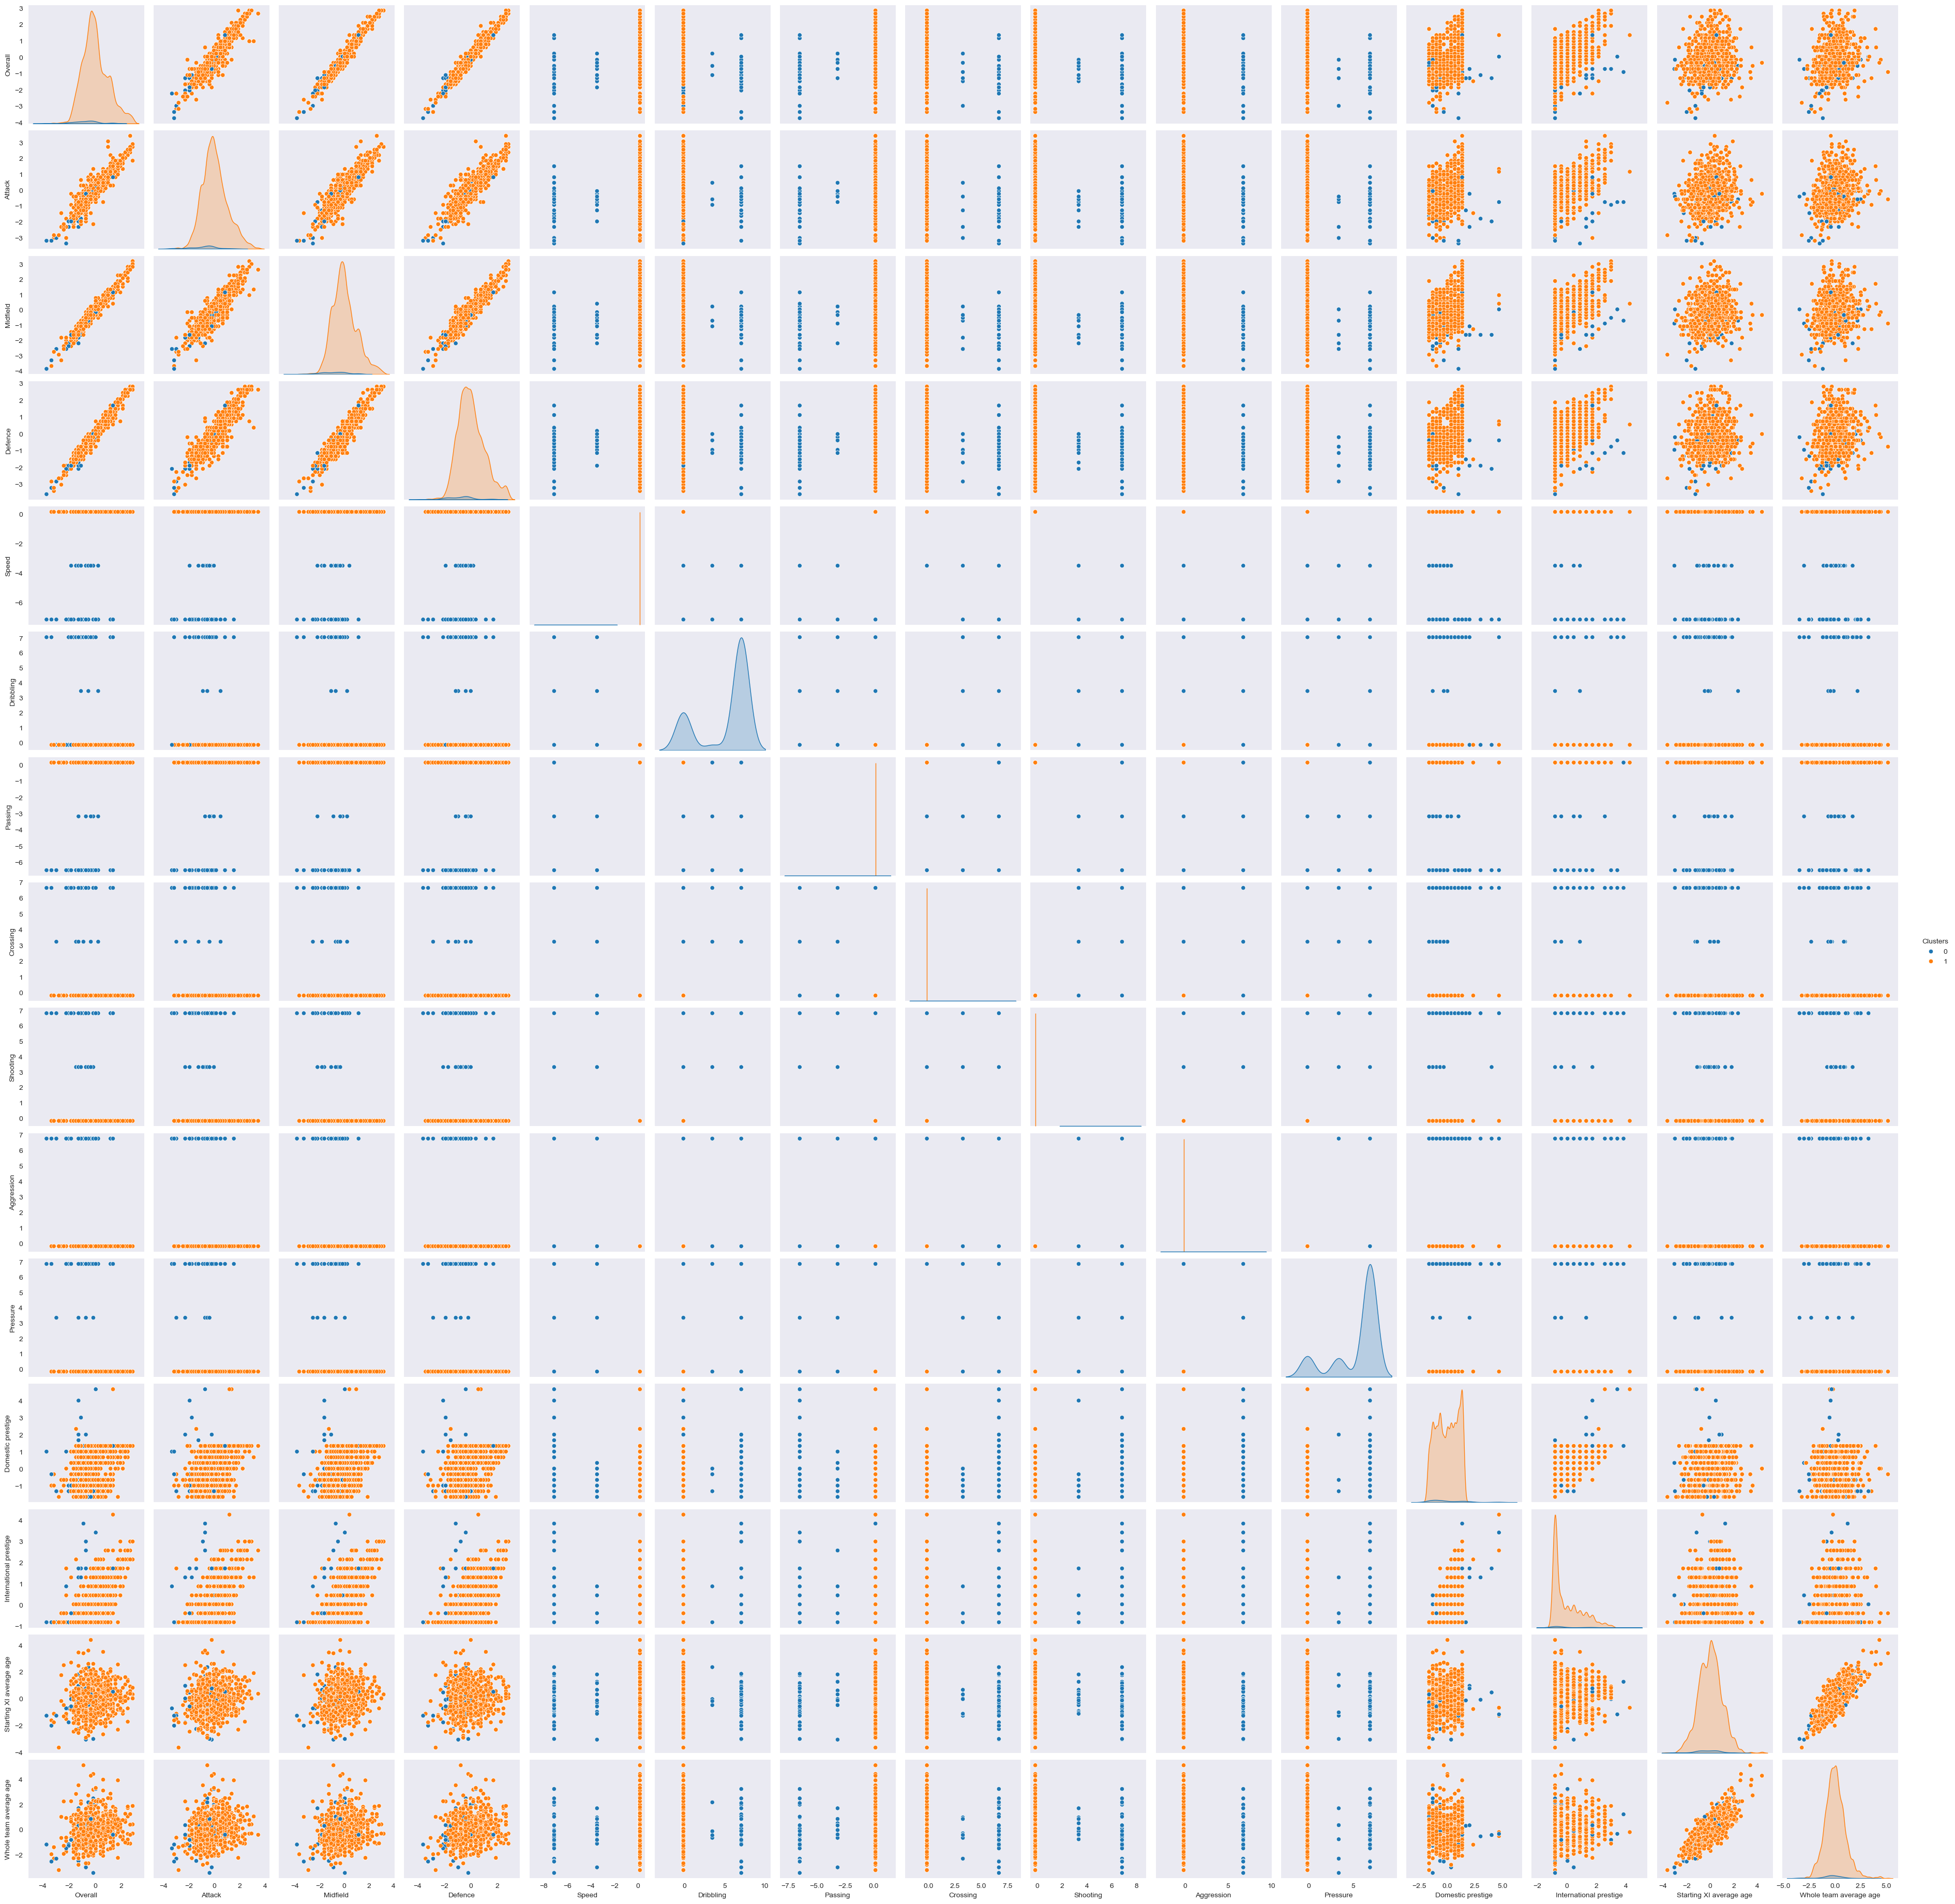

In [59]:
sbn.pairplot(standardized_fifa_df,hue='Clusters',vars=subset)
plt.show()

For whatever reason, our agglomerative clustering is just not picking up the clusters correctly, no matter which linkage method we choose to implement. As a result from this poor clustering, we cannot use agglomerative clustering as a method to visualize and cluster our data. 

# Story-Telling

From our K-Means cluster, we were able to paint a picture on what the successful teams do. First, with the three main phases of the teams, the higher overall teams consistently have higher ratings in these phases. This could be a strong indicator for football franchises, who if they feel like are potentially missing a phase and wondering if its really needed, we can see that accross the board all three phases need to be average at worse in order to have a higher rating. When it comes to team strategies, we can also gain some insight. The better rated teams are very fast, so if you find your team is slower, its possible that speed could be the difference. We also see these better teams doing less dribbling and more passing. This means one person is not holding onto the ball, but instead the ball is being passed around and shared. These 2 categories alone could be very indictive for a teams success. As a coach, if you feel one player is dribbling too much, it could very harmful and impactful to a teams success. Formulating a strategy around increase ball movement and lower individual time could increase wins. Of course, these are easier said then done. You need to identify players that can correctly implement these strategies. When formulating a roster, the GM and owner may avoid dribble happy players for those who are more tactical and okay passing the ball. Also, potentially every off-season targeting positional people (strikers, midfielders, or defenders) depending on which area is falling behind status quo. Between position and strategies, K-Means is potentially able to show what areas are needed to build a winning club. 

# Impact Section

The impact of building a successful sports franchise transcends just the world of sports. Sure, building a good team can bring winning and championships, but the affect it has outside of the arena or stadiums is just as if not more impactful to every day people. Building a good sports team helps the local economy, as people travel to these cities to watch the team. This helps resturaunts, hotels, traveling agencies and any other business. It helps the city as there is an increased amount of tax money coming in. This is why many cities bid so much money to aquire teams. We saw it during the expansion of the NFL, NBA or MLB in the U.S. Cities bidding billions to aquire a team for the city. Culture wise, sports teams can also be very unifying. You see during the Fifa World Cup, every year country pride jumps as people become proud of their teams. Same happens to cities. When thinking about American football, how many people care about Green Bay, Wisconsin? A small city all the way North by Canada. Yet every year you hear people tell you they are either from the city, state, or are a fan of a team. You can see people who live in Florida and California, but when they meet in the little city of Green Bay, they feel united by the team. This cultural impact as well is beneficial for the city or the country. So building a team that one could be proud of, can have an impact that transcends just money.